# K-NN in python: search for the best k

## 1- Load the required modeules

In [ ]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Function that shows the confusion matrix with a pretty Layout
def  prettyConfusionMatrix(confmat):
  fig, ax = plt.subplots(figsize=(2.5, 2.5))
  ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(confmat.shape[0]):
      for j in range(confmat.shape[1]):
          ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

  plt.xlabel('Predicted label')
  plt.ylabel('True label')

  plt.tight_layout()
  plt.savefig('ConMatrix.png', dpi=600)
  plt.show()
  return

def preprocessedData(balncesd):
  if balanced:
    getBalncedData


In [ ]:
from IPython.display import display, HTML

def reportClassesDataframe(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

def reportAccuracyDF(report):
  report = [x.split('      ') for x in report.split('\n')]
  values = []
  report[6].pop(2)
  df = pd.DataFrame(report[6:9])
  return df

def prettyReport(report):
    df = reportClassesDataframe(report)
    df2 = reportAccuracyDF(report)
    display(HTML(df.to_html(index=False,justify="center")))
    print("\n")
    display(HTML(df2.to_html( header=False,index=False,justify="center")))
    df
    df2
    return

## 2- Load the data
Load our training data, droping the building id and only selecting the first N rows (as our dataset has over 200000)

In [ ]:
seed = 1234

Xtrain = pd.read_csv("/content/drive/MyDrive/MD/Lab2/dades/v5/train_values_Prep.csv")
XtrainME = pd.read_csv("/content/drive/MyDrive/MD/Lab2/dades/v5/train_values_Prep_ME.csv")
XtrainBal = pd.read_csv("/content/drive/MyDrive/MD/Lab2/dades/v5/train_values_Prep_Bal.csv")
XtrainMEBal = pd.read_csv("/content/drive/MyDrive/MD/Lab2/dades/v5/train_values_Prep_ME_Bal.csv")

Xtest = pd.read_csv("/content/drive/MyDrive/MD/Lab2/dades/v5/test_values_Prep.csv")
XtestME = pd.read_csv("/content/drive/MyDrive/MD/Lab2/dades/v5/test_values_Prep_ME.csv")

ytrain = pd.read_csv("/content/drive/MyDrive/MD/Lab2/dades/v5/train_labels_Prep.csv")
ytrainBal = pd.read_csv("/content/drive/MyDrive/MD/Lab2/dades/v5/train_labels_Prep_Bal.csv")

cases = [["N", "N", "N"], ["ME", "ME", "N"], ["N_Bal", "N", "N_Bal"], ["ME_Bal", "ME", "N_Bal"]]
XTrainDic = dict()
XTestDic = dict()
yTrainDic = dict()

XTrainDic["N"] = Xtrain
XTrainDic["ME"] = XtrainME
XTrainDic["N_Bal"] = XtrainBal
XTrainDic["ME_Bal"] = XtrainMEBal

XTestDic["N"] = Xtest
XTestDic["ME"] = XtestME

yTrainDic["N"] = ytrain
yTrainDic["N_Bal"] = ytrainBal

## 3- Simple cross-validation

In [ ]:
for case in cases:
  X = XTrainDic[case[0]]
  y = yTrainDic[case[2]]
  print("Results for the " + str(case) + ": ")
  # Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
  (X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=seed)
  print("---- Without scaling:")
  # Create a kNN classifier object
  knc = nb.KNeighborsClassifier()

  # Train the classifier
  knc.fit(X_train, y_train)
  
  # Obtain accuracy score of learned classifier on test data
  print("     " + str(knc.score(X_test, y_test)))

  print("---- With scaling:")
  scaler = StandardScaler()

  X_train_scaled = scaler.fit_transform(X_train)
  col = X_train
  X_test_scaled = scaler.transform(X_test)

  # Create a kNN classifier object
  knc = nb.KNeighborsClassifier()

  # Train the classifier
  knc.fit(X_train_scaled, y_train)
  
  # Obtain accuracy score of learned classifier on test data
  print("     " + str(knc.score(X_test_scaled, y_test)))


Results for the ['N', 'N', 'N']: 
---- Without scaling:
     0.5865
---- With scaling:
     0.6008333333333333
Results for the ['ME', 'ME', 'N']: 
---- Without scaling:
     0.6465
---- With scaling:
     0.6861666666666667
Results for the ['N_Bal', 'N', 'N_Bal']: 
---- Without scaling:
     0.4411764705882353
---- With scaling:
     0.5380622837370242
Results for the ['ME_Bal', 'ME', 'N_Bal']: 
---- Without scaling:
     0.6136101499423299
---- With scaling:
     0.6753171856978085


## 4- Let's do a 10-fold cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

cvv = 10
scoring = ['accuracy', 'f1_weighted']

for case in cases:
  X = XTrainDic[case[0]]
  y = yTrainDic[case[2]]
  print("Results for the " + str(case) + ": ")
  print("---- Without scaling:")
  # Create a kNN classifier object
  cv_scores = cross_validate(nb.KNeighborsClassifier(),  
                            X=X,  
                            y=y,  
                            cv=cvv, scoring=scoring)  
  
  # Obtain accuracy score of learned classifier on test data
  print("     " + "Acc: " + str(np.mean(cv_scores['test_accuracy'])) + " - " + "W F1: " + str(np.mean(cv_scores['test_f1_weighted'])))

  print("---- With standard scaling:")
  scaler = StandardScaler()
  pipeline = Pipeline([('scaler', scaler), ('estimator', nb.KNeighborsClassifier())])
  cv_scores = cross_validate(pipeline,  
                            X=X,  
                            y=y,  
                            cv=cvv, scoring=scoring)
  print("     " + "Acc: " + str(np.mean(cv_scores['test_accuracy'])) + " - " + "W F1: " + str(np.mean(cv_scores['test_f1_weighted'])))
  print("---- With minmax scaling:")
  scaler = MinMaxScaler()
  pipeline = Pipeline([('scaler', scaler), ('estimator', nb.KNeighborsClassifier())])
  cv_scores = cross_validate(pipeline,  
                            X=X,  
                            y=y,  
                            cv=cvv, scoring=scoring)
  
  # Obtain accuracy score of learned classifier on test data
  print("     " + "Acc: " + str(np.mean(cv_scores['test_accuracy'])) + " - " + "W F1: " + str(np.mean(cv_scores['test_f1_weighted'])))
  print("---- With both scaling:")
  scaler = StandardScaler()
  scaler2 = MinMaxScaler()
  pipeline = Pipeline([('scaler', scaler),('scaler2', scaler2), ('estimator', nb.KNeighborsClassifier())])
  cv_scores = cross_validate(pipeline,  
                            X=X,  
                            y=y,  
                            cv=cvv, scoring=scoring)
  
  # Obtain accuracy score of learned classifier on test data
  print("     " + "Acc: " + str(np.mean(cv_scores['test_accuracy'])) + " - " + "W F1: " + str(np.mean(cv_scores['test_f1_weighted'])))

Results for the ['N', 'N', 'N']: 
---- Without scaling:
     Acc: 0.5976 - W F1: 0.5882576168905678
---- With standard scaling:
     Acc: 0.6055 - W F1: 0.5988264908051683
---- With minmax scaling:
     Acc: 0.6108 - W F1: 0.6051471612281314
---- With both scaling:
     Acc: 0.6106999999999999 - W F1: 0.6050401777753327
Results for the ['ME', 'ME', 'N']: 
---- Without scaling:
     Acc: 0.6496500000000001 - W F1: 0.6401926526469546
---- With standard scaling:
     Acc: 0.69015 - W F1: 0.6847800349426938
---- With minmax scaling:
     Acc: 0.6996500000000001 - W F1: 0.6948380487618148
---- With both scaling:
     Acc: 0.6995000000000001 - W F1: 0.6946983703958566
Results for the ['N_Bal', 'N', 'N_Bal']: 
---- Without scaling:
     Acc: 0.4600199096867823 - W F1: 0.45225272518789233
---- With standard scaling:
     Acc: 0.5588421197819529 - W F1: 0.5548557464054487
---- With minmax scaling:
     Acc: 0.5600630873207679 - W F1: 0.555713629837365
---- With both scaling:
     Acc: 0.5600630

In [ ]:
selected_case = cases[1]
selected_scaler = MinMaxScaler()

X = XTrainDic[selected_case[0]]
y = yTrainDic[selected_case[2]]
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=seed)
pipeline = Pipeline([('scaler', scaler), ('estimator', nb.KNeighborsClassifier())])

In [ ]:
# Method 2
# Build confussion matrix of all 10 cross-validations
predicted = cross_val_predict(pipeline, X=X, y=y,  cv=10)  

print(sklearn.metrics.confusion_matrix(y, predicted))
print(sklearn.metrics.accuracy_score(y, predicted))

[[ 820 1078   28]
 [ 700 9100 1653]
 [  73 2665 3883]]
0.69015


In [ ]:
print(sklearn.metrics.cohen_kappa_score(y, predicted))

0.4181268709616619


# Obtain Recall, Precision and F-Measure for each class

In [ ]:
from sklearn import metrics

prettyReport(sklearn.metrics.classification_report(y, predicted))

Class Name,precision,recall,f1-score,support
1,0.51,0.43,0.47,1926
2,0.71,0.79,0.75,11453
3,0.70,0.59,0.64,6621


accuracy,,,0.69 20000
macro avg,0.64,0.60,0.62 20000
weighted avg,0.69,0.69,0.68 20000


### Let's see how ammount of training data influences accuracy 

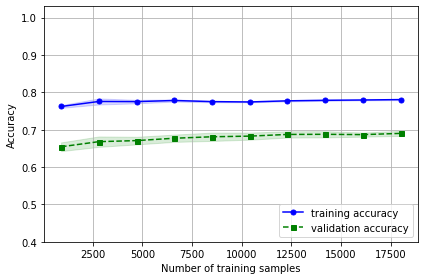

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipeline,
                               X=X,
                               y=y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 1.03])
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

## 5- Finding parameters for k-NN

### Authomatically find best parameters:

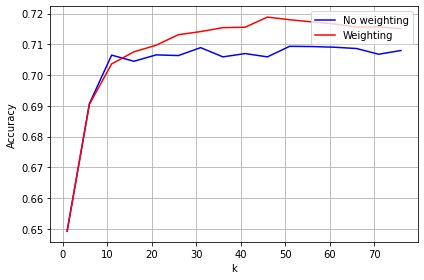

In [ ]:
lr = []


for ki in range(1,80,5):
    pipeline = Pipeline([('scaler', selected_scaler), ('estimator', nb.KNeighborsClassifier(n_neighbors=ki))])
    cv_scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,80,5),lr,'b',label='No weighting')

lr = []
for ki in range(1,80,5):
    pipeline = Pipeline([('scaler', selected_scaler), ('estimator', nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'))])
    cv_scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,80,5),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

### Do the same using Grid Search method in python

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'estimator__n_neighbors':list(range(30,60,2)), 'estimator__weights':('distance','uniform')}
clf = GridSearchCV(pipeline, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'estimator__n_neighbors': 46, 'estimator__weights': 'distance'} Accuracy= 0.7188571428571429


Apply models with best parameters found trained with all training data to the test set

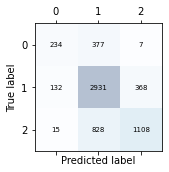

Class Name,precision,recall,f1-score,support
1,0.61,0.38,0.47,618
2,0.71,0.85,0.77,3431
3,0.75,0.57,0.65,1951


accuracy,,,0.71,6000
macro avg,0.69,0.60,0.63,6000
weighted avg,0.71,0.71,0.70,6000


In [ ]:
parval=clf.best_params_
X_train = selected_scaler.fit_transform(X_train)
X_test = selected_scaler.transform(X_test)
knc = nb.KNeighborsClassifier(n_neighbors=parval['estimator__n_neighbors'],weights=parval['estimator__weights'])
knc.fit(X_train, y_train)

pred=knc.predict(X_test)
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
prettyConfusionMatrix(confmat)
prettyReport(sklearn.metrics.classification_report(y_test, pred))